# IMD3004 - Aprendizado Profundo

### Professor: Dr. Silvan Ferreira da Silva Junior

### Aluno: João Antonio Costa Paiva Chagas

## Importações

In [8]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

## Imagem utilizada

In [9]:
# URL da imagem de exemplo
image_url = "https://lirp.cdn-website.com/7ece8951/dms3rep/multi/opt/972752326-640w.jpg"
image_filename = "dog.jpg"

# Baixa a imagem
response = requests.get(image_url)
with open(image_filename, "wb") as f:
    f.write(response.content)

gray_image_loaded = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

## Funções e filtros auxiliares

In [10]:
def convolution2d(image, kernel):
    # Dimensões da imagem e do kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Dimensões da imagem de saída
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Inicializa a matriz de saída com zeros
    output = np.zeros((output_height, output_width))

    # Itera sobre cada pixel da imagem para aplicar o kernel
    for y in range(output_height):
        for x in range(output_width):
            # Extrai a região da imagem correspondente ao kernel
            region = image[y:y + kernel_height, x:x + kernel_width]

            # Aplica a operação de convolução (produto escalar elemento a elemento e soma)
            output[y, x] = np.sum(region * kernel)

    return output

In [11]:
blur_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

sharpen_kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
])

## Exercícios

### 1. Implemente o filtro *Bevel* manualmente e aplique-o em uma imagem.

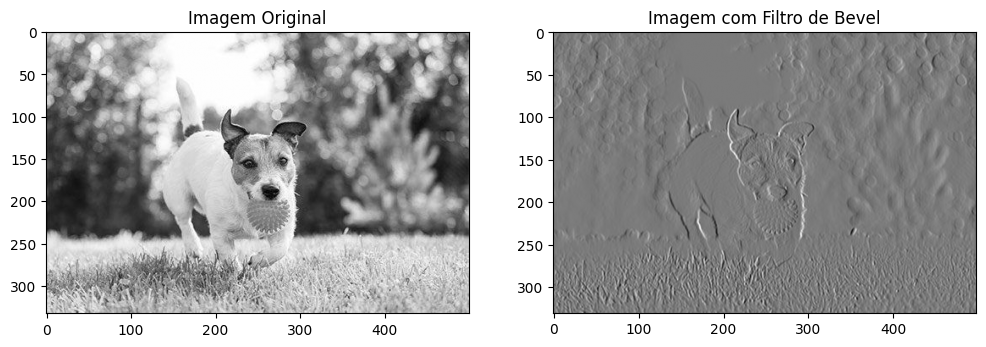

In [12]:
# Kernel de Bevel
bevel_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

# Aplica o filtro de bevel na imagem
beveled_image = convolution2d(gray_image_loaded, bevel_kernel)

# Exibe os resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(gray_image_loaded, cmap='gray')
axes[0].set_title("Imagem Original")
axes[1].imshow(beveled_image, cmap='gray')
axes[1].set_title("Imagem com Filtro de Bevel")
plt.show()

### 2. Faça upload de uma imagem RGB e aplique um filtro diferente para cada canal de cor. Em seguida, forma uma nova imagem colorida.

In [13]:
image_filename="325547.jpg"

bgr_image_loaded = cv2.imread(image_filename, cv2.IMREAD_COLOR)
rgb_image_loaded = cv2.cvtColor(bgr_image_loaded, cv2.COLOR_BGR2RGB)

Aplicando filtro Sharpen no canal Vermelho...
Aplicando filtro Blur no canal Verde...
Aplicando filtro Bevel no canal Azul...


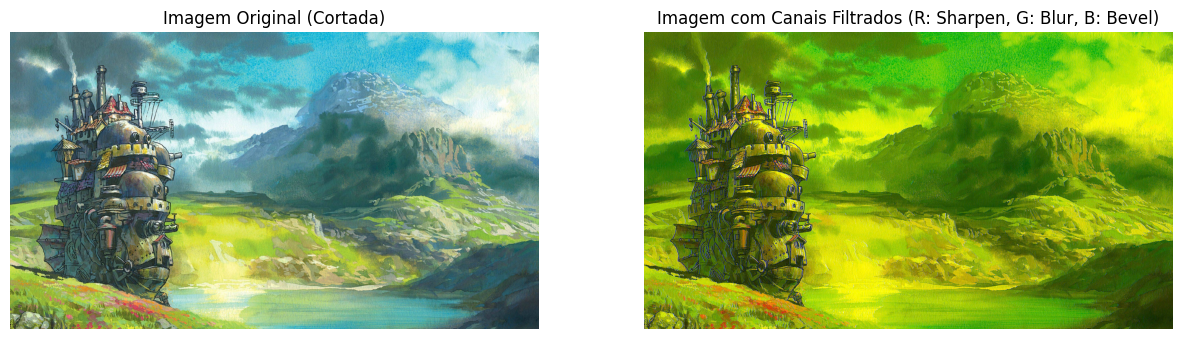

In [14]:
red_channel = rgb_image_loaded[:, :, 0]
green_channel = rgb_image_loaded[:, :, 1]
blue_channel = rgb_image_loaded[:, :, 2]

print("Aplicando filtro Sharpen no canal Vermelho...")
red_filtered = convolution2d(red_channel, sharpen_kernel)

print("Aplicando filtro Blur no canal Verde...")
green_filtered = convolution2d(green_channel, blur_kernel)

print("Aplicando filtro Bevel no canal Azul...")
blue_filtered = convolution2d(blue_channel, bevel_kernel)

output_h, output_w = red_filtered.shape
original_cropped = rgb_image_loaded[:output_h, :output_w, :]

red_filtered = np.clip(red_filtered, 0, 255)
green_filtered = np.clip(green_filtered, 0, 255)
blue_filtered = np.clip(blue_filtered, 0, 255)

new_image = np.stack([
    red_filtered,
    green_filtered,
    blue_filtered
], axis=2).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(original_cropped)
axes[0].set_title("Imagem Original (Cortada)")
axes[1].imshow(new_image)
axes[1].set_title("Imagem com Canais Filtrados (R: Sharpen, G: Blur, B: Bevel)")
for ax in axes:
    ax.axis('off')

plt.show()